# Otto Group Product Classification

## Project Overview

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They sell millions of products worldwide every day, with several thousand products being added to their product line.


![](https://storage.googleapis.com/kaggle-competitions/kaggle/4280/media/Grafik.jpg)

## Problem Statement


A consistent analysis of the performance of products is crucial. However, due to their diverse global infrastructure, many **identical products get classified differently**. Therefore, the quality of their product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights that can generate about their product range.

## The Task

The task is to build a classification model that accurately classifies products based on the given features into the right categories.

## Data Description

Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.

There are nine categories for all products. Each target category represents one of our most important product categories (like fashion, electronics, etc.).

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Model Building</a>

<a href=#six>6. Model Evaluation</a>

<a href=#seven>7. Resampling Classes</a>

<a href=#eight>8. Hyperparameter Tuning</a>

<a href=#nine>9. Saving Model</a>

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. References</a>




 <a id="one"></a>
# 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [251]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<a id="two"></a>
# 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [252]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/otto-group-product-classification-challenge/data')

Skipping, found downloaded files in ".\otto-group-product-classification-challenge" (use force=True to force download)


In [253]:
os.listdir('otto-group-product-classification-challenge')

['sampleSubmission.csv', 'test.csv', 'train.csv']

In [254]:
train = pd.read_csv('otto-group-product-classification-challenge/train.csv')
test = pd.read_csv('otto-group-product-classification-challenge/test.csv')

In [255]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,5,0,0,0,0,0,2,0,0,0,0,0,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,0,0,0,2,0,2,0,1,2,1,3,0,0,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


In [6]:
train.shape

(61878, 95)

In [7]:
test.shape

(144368, 94)

### `data fields`
**id** - an anonymous id unique to a product

**feat_1, feat_2, ..., feat_93** - the various features of a product

**target** - the class of a product

<a id="three"></a>
# 3. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



In [8]:
# checking column info such as number of non-null, column name and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [9]:
train.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,1.252869,0.140874,0.480979,1.696693,1.284398,1.413459,0.366108,0.575423,0.551699,0.471525,0.204014,0.729969,0.142522,2.643880,1.534520,0.563108,0.696613,0.238970,0.275768,0.150312,0.148680,1.043796,0.696516,0.946411,0.666263,0.709089,0.263632,0.582129,0.485585,1.653059,0.303468,0.698019,0.451146,0.560829,0.238130,0.641375,0.249669,1.584893,0.348314,0.324283,0.053298,0.213485,0.442063,2.072465,0.323120,0.303775,0.309108,0.697970,0.388603,1.029930,0.239746,1.187563,0.168590,1.256796,0.222228,0.571706,2.897653,0.392902,0.811128,0.892789,0.319290,0.858722,0.591050,0.579851,0.726817,0.748457,0.124196,0.366415,0.300446,0.698067,0.078461,0.187983,0.496719,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,3.042333,0.567089,2.014697,3.163212,3.862236,2.226163,1.477436,1.335985,4.636145,1.438727,0.696050,1.446220,0.782979,4.629015,2.332994,1.710305,2.873222,0.828112,1.901294,1.640880,0.897354,2.416849,1.310202,3.368622,3.197965,2.555119,0.756934,1.602579,3.298315,3.299798,1.085672,1.961189,1.706013,1.346090,2.587131,2.348359,1.446203,2.577071,1.369380,1.720470,0.513820,1.044788,2.006485,4.113319,0.998743,1.925806,1.082148,3.983722,2.577693,3.028469,1.017553,2.666742,0.946158,3.402080,0.783052,1.361874,4.974322,1.761054,4.111091,1.941368,1.162443,2.411646,5.783233,3.757822,3.200095,2.920038,0.906621,2.778317,1.285569,2.245671,0.461244,0.836269,2.434921,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [10]:
# checking for missing values
train.isna().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
feat_5     0
feat_6     0
feat_7     0
feat_8     0
feat_9     0
feat_10    0
feat_11    0
feat_12    0
feat_13    0
feat_14    0
feat_15    0
feat_16    0
feat_17    0
feat_18    0
feat_19    0
feat_20    0
feat_21    0
feat_22    0
feat_23    0
feat_24    0
feat_25    0
feat_26    0
feat_27    0
feat_28    0
feat_29    0
feat_30    0
feat_31    0
feat_32    0
feat_33    0
feat_34    0
feat_35    0
feat_36    0
feat_37    0
feat_38    0
feat_39    0
feat_40    0
feat_41    0
feat_42    0
feat_43    0
feat_44    0
feat_45    0
feat_46    0
feat_47    0
feat_48    0
feat_49    0
feat_50    0
feat_51    0
feat_52    0
feat_53    0
feat_54    0
feat_55    0
feat_56    0
feat_57    0
feat_58    0
feat_59    0
feat_60    0
feat_61    0
feat_62    0
feat_63    0
feat_64    0
feat_65    0
feat_66    0
feat_67    0
feat_68    0
feat_69    0
feat_70    0
feat_71    0
feat_72    0
feat_73    0
feat_74    0
feat_75    0
feat_76    0

Fortunately, there's no column with missing values

In [11]:
# lets check the unique categories under target column
train['target'].unique()

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

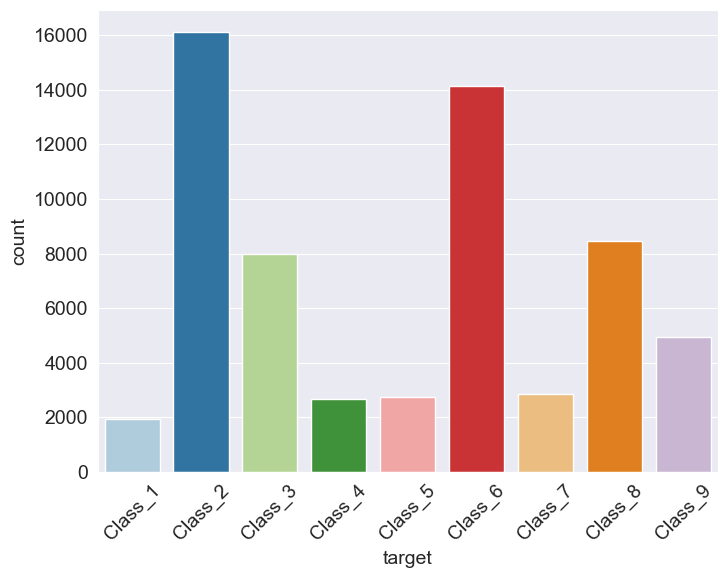

In [268]:
# lets look at the distribution of the target variable
sns.set_palette("Paired", 10)
plt.rcParams["figure.figsize"] = [8, 6]
sns.countplot(data = train, x='target')
plt.xticks(rotation=45);

Seems class_2 and class_6 are the most common classes

 <a id="four"></a>
# 4. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

In [269]:
# creating input and target columns for training set
X_cols = list(train.columns)[1:-1]
y_col = 'target'

In [270]:
X = train[X_cols].copy()
y = train[y_col].copy()

In [272]:
# creating input columns for test set
X_test = test[X_cols].copy()

From our Exploratory Data analysis, we observed the follow about the data;
* There are no missing values in the train and test sets, so there was no need to fill in missing values
* All columns are numeric except for the target column, hence no need to use oneHotenconding

_This means that we can proceed to scaling the numeric columns_

### Scaling Numeric Features

In [274]:
from sklearn.preprocessing import MinMaxScaler
# creating scaling function
def scale_df(df):
    scaler = MinMaxScaler().fit(df)
    scaled = scaler.transform(df)
    return scaled

In [275]:
X_scaled = scale_df(X)

In [276]:
X_test_scaled = scale_df(X_test) 


 <a id="five"></a>
# 5. Model Building
<a href=#cont>Back to Table of Contents</a>

In [21]:
from sklearn.model_selection import train_test_split

In [278]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

In [279]:
# Building classification models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

For this project, I will be using Support Vector Classifier and Random Forest Models

In [280]:
#importing base models
svc = SVC()
rf = RandomForestClassifier()

In [281]:
#fitting models
svc.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [282]:
# making train predictions with both models
train_pred_svc = svc.predict(X_train)
train_pred_rf = rf.predict(X_train)


 <a id="six"></a>
# 6. Model Evaluation
<a href=#cont>Back to Table of Contents</a>

### `evaluating train accuracy for SVC model`

              precision    recall  f1-score   support

     Class_1       0.77      0.50      0.61      1530
     Class_2       0.67      0.93      0.77     12944
     Class_3       0.67      0.35      0.46      6443
     Class_4       0.91      0.33      0.48      2153
     Class_5       0.97      0.95      0.96      2174
     Class_6       0.95      0.95      0.95     11251
     Class_7       0.81      0.67      0.73      2287
     Class_8       0.89      0.94      0.91      6790
     Class_9       0.86      0.88      0.87      3930

    accuracy                           0.80     49502
   macro avg       0.83      0.72      0.75     49502
weighted avg       0.81      0.80      0.79     49502



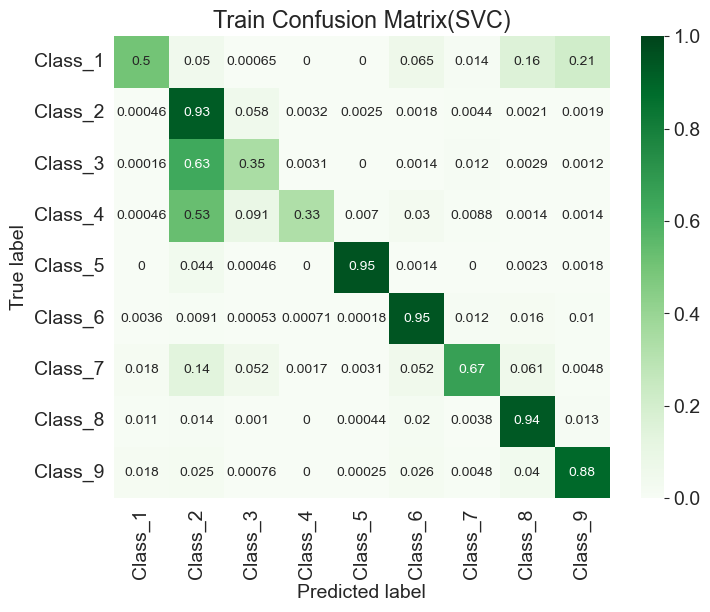

In [288]:
print(metrics.classification_report(y_train, train_pred_svc))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_train, train_pred_svc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,
            cmap='Greens',
            xticklabels=svc.classes_, 
            yticklabels=svc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Train Confusion Matrix(SVC)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Our SVC model gave a model accuracy of 80%

### `evaluating train accuracy for RandomForest model`

              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00      1530
     Class_2       1.00      1.00      1.00     12944
     Class_3       1.00      1.00      1.00      6443
     Class_4       1.00      1.00      1.00      2153
     Class_5       1.00      1.00      1.00      2174
     Class_6       1.00      1.00      1.00     11251
     Class_7       1.00      1.00      1.00      2287
     Class_8       1.00      1.00      1.00      6790
     Class_9       1.00      1.00      1.00      3930

    accuracy                           1.00     49502
   macro avg       1.00      1.00      1.00     49502
weighted avg       1.00      1.00      1.00     49502



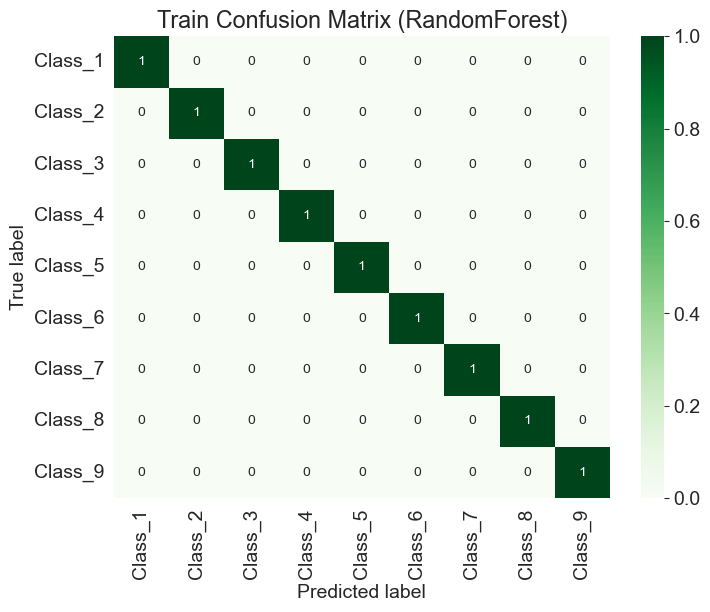

In [290]:
print(metrics.classification_report(y_train, train_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_train, train_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,
            cmap = 'Greens',
            xticklabels=svc.classes_, 
            yticklabels=svc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Train Confusion Matrix (RandomForest)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**RandomForest Model** achieved an accuracy score of 100%, we will investigate further to see if this will overfit.

### `evaluating validation accuracy for SVC model`

In [291]:
# validation preds
val_pred_svc = svc.predict(X_val)
val_pred_rf = rf.predict(X_val)

              precision    recall  f1-score   support

     Class_1       0.66      0.44      0.53       399
     Class_2       0.65      0.91      0.76      3178
     Class_3       0.59      0.31      0.41      1561
     Class_4       0.85      0.29      0.43       538
     Class_5       0.97      0.95      0.96       565
     Class_6       0.94      0.93      0.94      2884
     Class_7       0.78      0.61      0.68       552
     Class_8       0.84      0.92      0.88      1674
     Class_9       0.85      0.85      0.85      1025

    accuracy                           0.78     12376
   macro avg       0.79      0.69      0.71     12376
weighted avg       0.78      0.78      0.76     12376



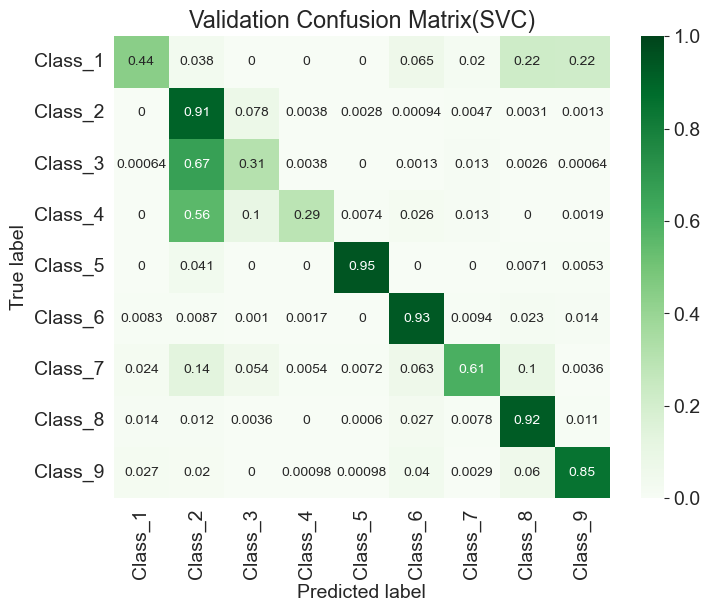

In [292]:
print(metrics.classification_report(y_val, val_pred_svc))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_val, val_pred_svc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,
            cmap='Greens',
            xticklabels=svc.classes_, 
            yticklabels=svc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Validation Confusion Matrix(SVC)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Our validation accuracy is 78% which is not too distant from our train accuracy of 80%

### `evaluating validation accuracy for RandomForest model`

              precision    recall  f1-score   support

     Class_1       0.84      0.44      0.58       399
     Class_2       0.71      0.88      0.79      3178
     Class_3       0.63      0.48      0.54      1561
     Class_4       0.84      0.42      0.56       538
     Class_5       0.97      0.98      0.98       565
     Class_6       0.93      0.95      0.94      2884
     Class_7       0.78      0.56      0.65       552
     Class_8       0.86      0.94      0.90      1674
     Class_9       0.86      0.87      0.87      1025

    accuracy                           0.81     12376
   macro avg       0.82      0.72      0.76     12376
weighted avg       0.81      0.81      0.80     12376



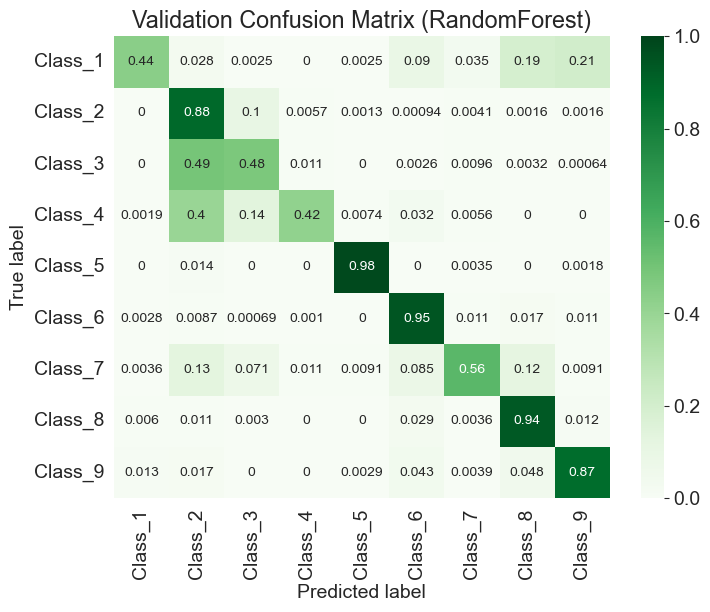

In [294]:
print(metrics.classification_report(y_val, val_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_val, val_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,
            cmap = 'Greens',
            xticklabels=svc.classes_, 
            yticklabels=svc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Validation Confusion Matrix (RandomForest)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

We can see that the Randomforest model is clearly overfitting, with a training accuracy of 100% and Validation accuracy of 81%, about 19% difference


 <a id="seven"></a>
# 7. Resampling Classes
<a href=#cont>Back to Table of Contents</a>

During our Exploratory data analysis, we discovered that some classes are much more prevalent than the others. This phenomenom is called `class imbalance`. Class imbalance occurs when the number of observations across different class labels are unevenly distributed. In training our classification model, it is preferable for all classes to have a relatively even split of observations. However, in the wild, classification datasets often come with unevenly distributed observations with one class or set of classes having way more observations than others.

To solve this we will use a method known as resampling to `upsample` the minority class.

![](https://github.com/Explore-AI/Pictures/blob/master/class-imbalance.png?raw=true)

In [295]:
# import resample
from sklearn.utils import resample

In [297]:
# we are using the class size of the highest class which is "Class_2"
class_size = int(len(train[train['target']=='Class_2']))

seperate the four classes to make it easier to resample our data


In [298]:
class_1 = train[train['target']=='Class_1']
class_2 = train[train['target']=='Class_2']
class_3 = train[train['target']=='Class_3']
class_4 = train[train['target']=='Class_4']
class_5 = train[train['target']=='Class_5']
class_6 = train[train['target']=='Class_6']
class_7 = train[train['target']=='Class_7']
class_8 = train[train['target']=='Class_8']
class_9 = train[train['target']=='Class_9']

In [299]:
# Upsample minority
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)
class_3_up = resample(class_3,replace=True,n_samples=class_size, random_state=27)
class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)
class_5_up = resample(class_5,replace=True,n_samples=class_size, random_state=27)
class_6_up = resample(class_6,replace=True,n_samples=class_size, random_state=27)
class_7_up = resample(class_7,replace=True,n_samples=class_size, random_state=27)
class_8_up = resample(class_8,replace=True,n_samples=class_size, random_state=27)
class_9_up = resample(class_9,replace=True,n_samples=class_size, random_state=27)

we need to create a new DataFrame out of the balanced bata


In [300]:
resampled_df = pd.concat([class_1_up, class_2_up,class_3_up, class_4_up,class_5_up, class_6_up,class_7_up, class_8_up,class_9_up])

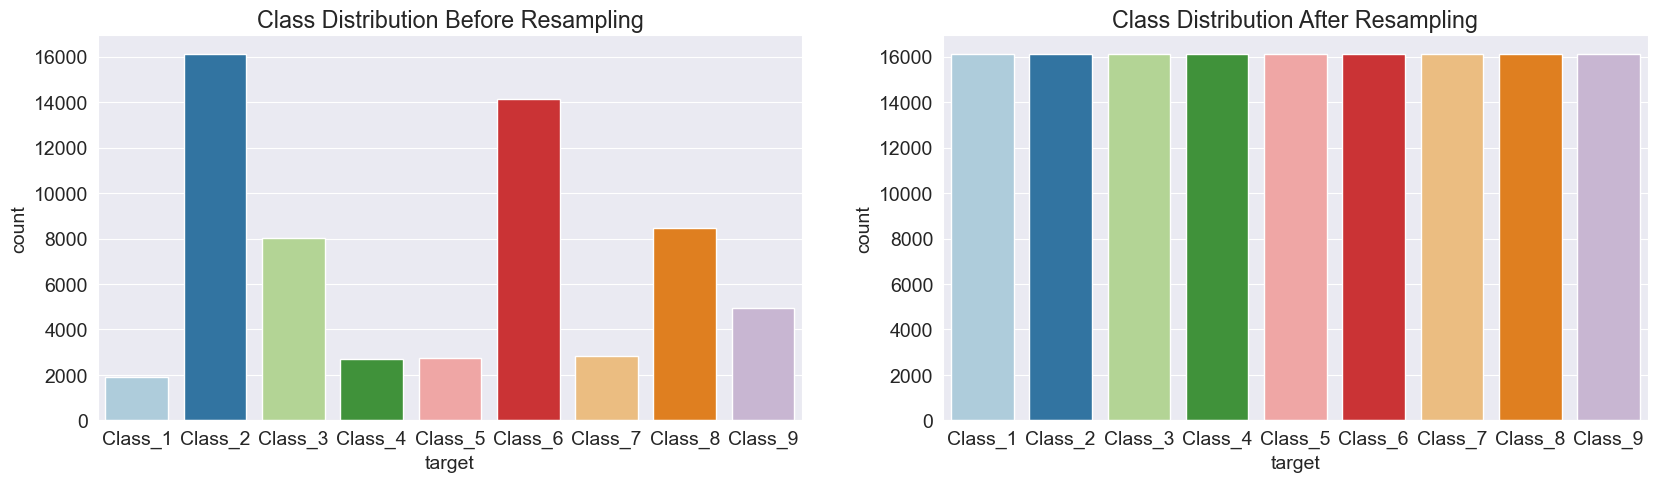

In [301]:
#lets visualize the distribution of our resampled data

plt.rcParams["figure.figsize"] = [20, 5]

f, axes = plt.subplots(1, 2)
sns.set_palette("Paired", 10)
sns.countplot(data=train, x='target',ax=axes[0]).set(title='Class Distribution Before Resampling')
sns.countplot(data = resampled_df,x='target',ax=axes[1]).set(title='Class Distribution After Resampling')
plt.show()

As we can observed, our targets are  now evenly distributed

Lets retrain our model with the resampled data

In [302]:
resampled_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
1043,1044,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,1,1,2,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,Class_1
1720,1721,1,0,2,0,0,0,0,0,1,4,1,0,4,6,0,9,0,0,1,0,0,14,0,4,4,0,0,0,4,0,0,2,2,2,0,0,0,1,0,0,0,4,0,5,0,0,0,4,0,1,0,0,38,10,5,0,1,0,1,0,0,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,3,1,0,0,0,0,1,0,Class_1
1864,1865,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,Class_1
543,544,0,0,0,0,0,0,0,2,0,0,2,1,11,0,0,1,0,4,0,0,0,0,0,3,0,0,0,0,2,2,0,2,0,0,0,4,1,0,0,0,0,0,0,1,0,0,1,5,2,0,0,0,0,5,0,0,0,0,0,0,0,1,0,2,0,0,13,0,0,0,2,0,0,0,1,5,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,0,Class_1
1848,1849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,5,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Class_1


In [342]:
# identifying input and target cols
# creating input and target columns for training set
RX_cols = list(resampled_df.columns)[1:-1]
Ry_col = 'target'

In [304]:
X_res = resampled_df[RX_cols].copy()
y_res = resampled_df[Ry_col].copy()

In [305]:
# scaling features
X_res_scaled = scale_df(X_res)

In [306]:
#splitting for training and validation
X_train, X_val, y_train, y_val= train_test_split(X_res_scaled,y_res,test_size=0.2, random_state=42)

In [307]:
# fitting resampled df
rf.fit(X_train,y_train)
svc.fit(X_train,y_train)

SVC()

In [312]:
# train predictions 
res_pred_svc = svc.predict(X_train)
res_pred_rf = rf.predict(X_train)

### `evaluating Train accuracy for SVC model after Resampling`

              precision    recall  f1-score   support

     Class_1       0.80      0.86      0.83     12919
     Class_2       0.70      0.63      0.67     12879
     Class_3       0.63      0.72      0.67     12854
     Class_4       0.81      0.77      0.79     12894
     Class_5       0.98      0.98      0.98     12981
     Class_6       0.94      0.92      0.93     12853
     Class_7       0.85      0.86      0.86     12910
     Class_8       0.93      0.89      0.91     12895
     Class_9       0.90      0.88      0.89     12893

    accuracy                           0.84    116078
   macro avg       0.84      0.84      0.84    116078
weighted avg       0.84      0.84      0.84    116078



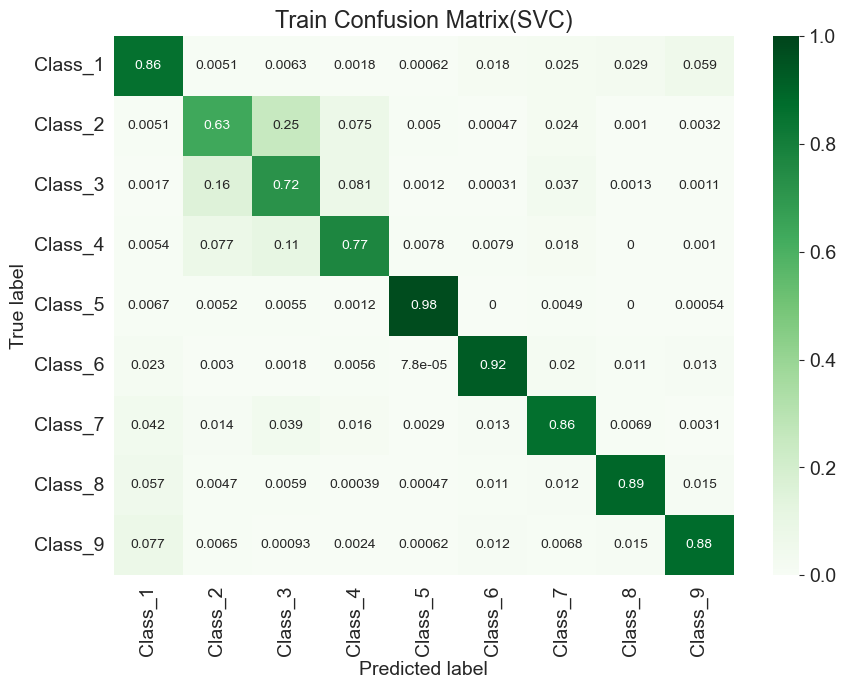

In [331]:
# train predictions for Random Forest
print(metrics.classification_report(y_train, res_pred_svc))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_train, res_pred_svc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,
            cmap='Greens',
            xticklabels=svc.classes_, 
            yticklabels=svc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Train Confusion Matrix(SVC)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

We can see the effect of resampling!, from 80% before resampling to 84% train accuracy after resampling

### `evaluating Train accuracy for RandomForest model after Resampling`

              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00     12919
     Class_2       1.00      1.00      1.00     12879
     Class_3       1.00      1.00      1.00     12854
     Class_4       1.00      1.00      1.00     12894
     Class_5       1.00      1.00      1.00     12981
     Class_6       1.00      1.00      1.00     12853
     Class_7       1.00      1.00      1.00     12910
     Class_8       1.00      1.00      1.00     12895
     Class_9       1.00      1.00      1.00     12893

    accuracy                           1.00    116078
   macro avg       1.00      1.00      1.00    116078
weighted avg       1.00      1.00      1.00    116078



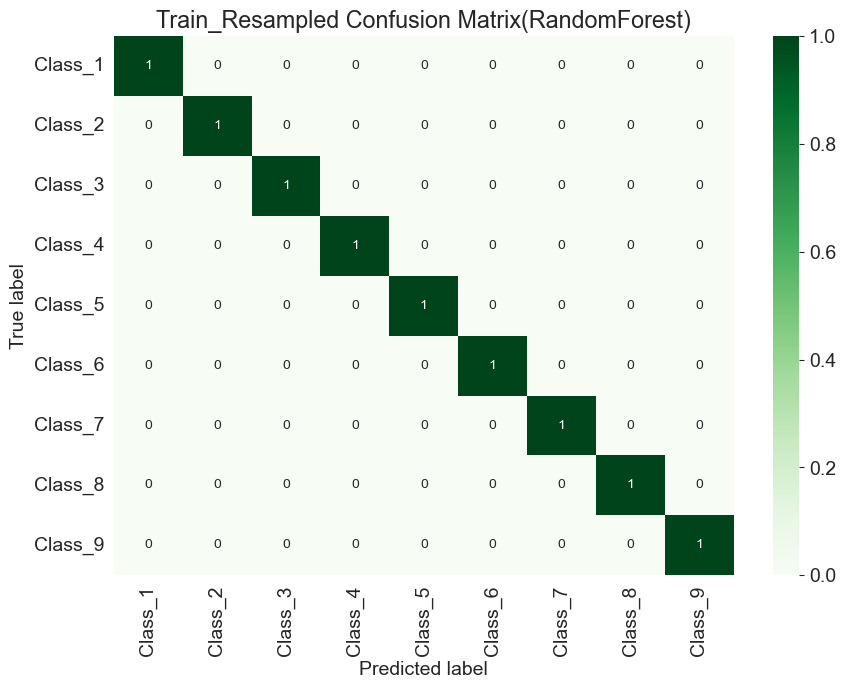

In [330]:
# train predictions for SVC
print(metrics.classification_report(y_train, res_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_train, res_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,
            cmap='Greens',
            xticklabels=svc.classes_, 
            yticklabels=svc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Train_Resampled Confusion Matrix(RandomForest)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The train accuracy for RandomForest is still at 100%

Let's Evaluate The Validation accuracy for both models after resampling

In [ ]:
# validation prediction
resv_pred_rf = rf.predict(X_val)
resv_pred_svc= svc.predict(X_val)

### `evaluating validation accuracy for SVC model after Resampling`

              precision    recall  f1-score   support

     Class_1       0.78      0.84      0.81      3203
     Class_2       0.67      0.62      0.64      3243
     Class_3       0.61      0.69      0.65      3268
     Class_4       0.79      0.75      0.77      3228
     Class_5       0.98      0.98      0.98      3141
     Class_6       0.93      0.91      0.92      3269
     Class_7       0.83      0.86      0.85      3212
     Class_8       0.92      0.88      0.90      3227
     Class_9       0.90      0.87      0.88      3229

    accuracy                           0.82     29020
   macro avg       0.83      0.82      0.82     29020
weighted avg       0.82      0.82      0.82     29020



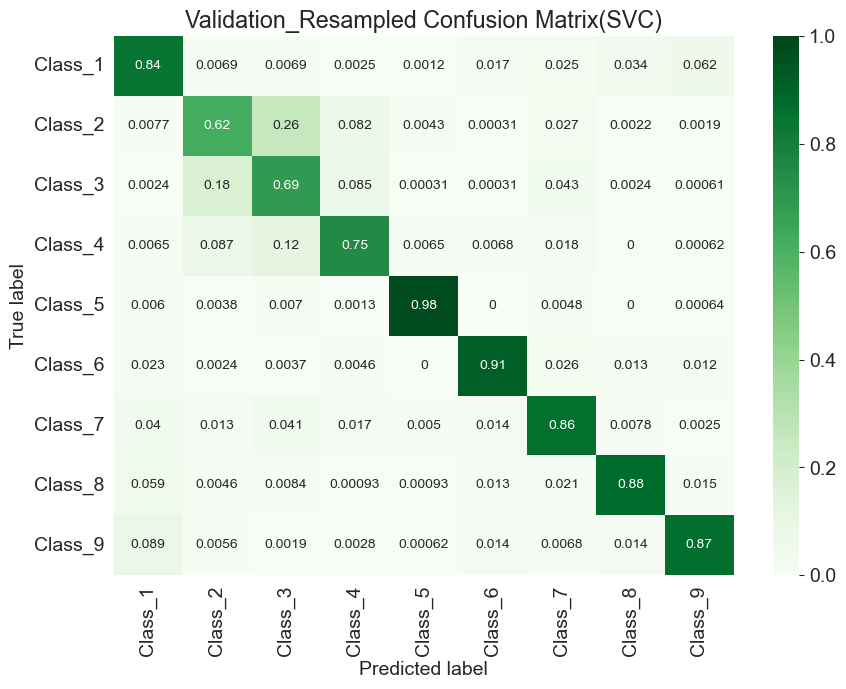

In [328]:
# Validation predictions for random forest
print(metrics.classification_report(y_val, resv_pred_svc))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_val, resv_pred_svc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,
            cmap='Greens',
            xticklabels=svc.classes_, 
            yticklabels=svc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Validation_Resampled Confusion Matrix(SVC)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

We have increased our validation accuracy from 78% to 82% which is good

### `evaluating validation accuracy for Randomforest model after Resampling`

              precision    recall  f1-score   support

     Class_1       0.99      1.00      1.00      3203
     Class_2       0.93      0.90      0.92      3243
     Class_3       0.92      0.93      0.92      3268
     Class_4       0.98      1.00      0.99      3228
     Class_5       1.00      1.00      1.00      3141
     Class_6       0.99      0.97      0.98      3269
     Class_7       0.98      1.00      0.99      3212
     Class_8       0.99      0.99      0.99      3227
     Class_9       0.99      0.99      0.99      3229

    accuracy                           0.97     29020
   macro avg       0.97      0.98      0.97     29020
weighted avg       0.97      0.97      0.97     29020



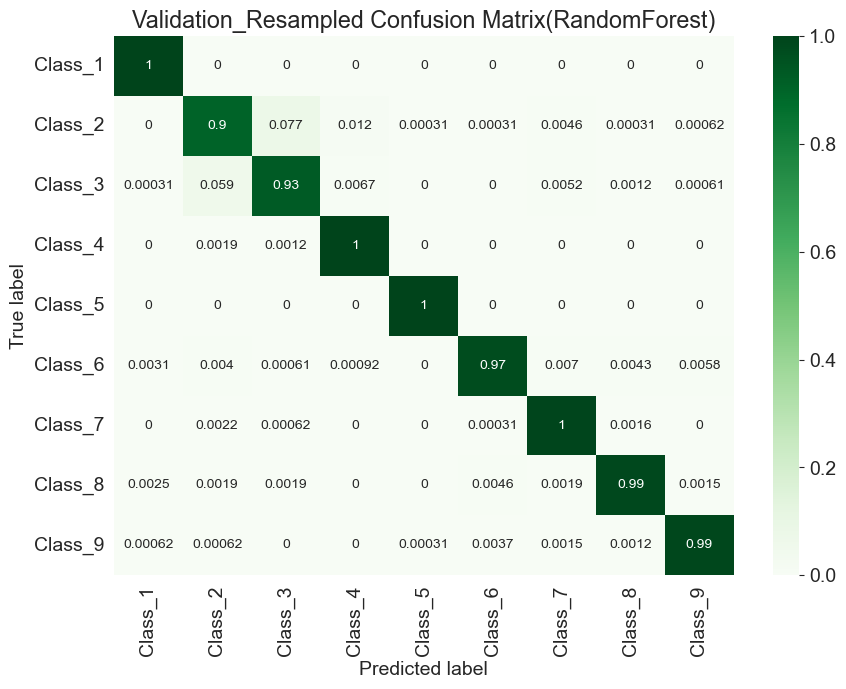

In [329]:
# Validation predictions for random forest
print(metrics.classification_report(y_val, resv_pred_rf))

# Generate a normalized confusion matrix
cm = confusion_matrix(y_val, resv_pred_rf)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm,
            cmap='Greens',
            xticklabels=svc.classes_, 
            yticklabels=svc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10})

# Adding headings and lables
plt.title('Validation_Resampled Confusion Matrix(RandomForest)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Great!, we have increased our validation accuracy from 81% to 97%, which is Ok since our train accuracy was 100%.

Since, RandomForest was the best performing, it is appropriate that we proceed with it from here.

Let's look at some of the important features of our model

In [320]:
importance_df = pd.DataFrame({
    'feature': RX_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

In [321]:
importance_df.head()

,feature,importance
33,feat_34,0.082951
10,feat_11,0.030518
66,feat_67,0.030359
24,feat_25,0.030107
13,feat_14,0.026748


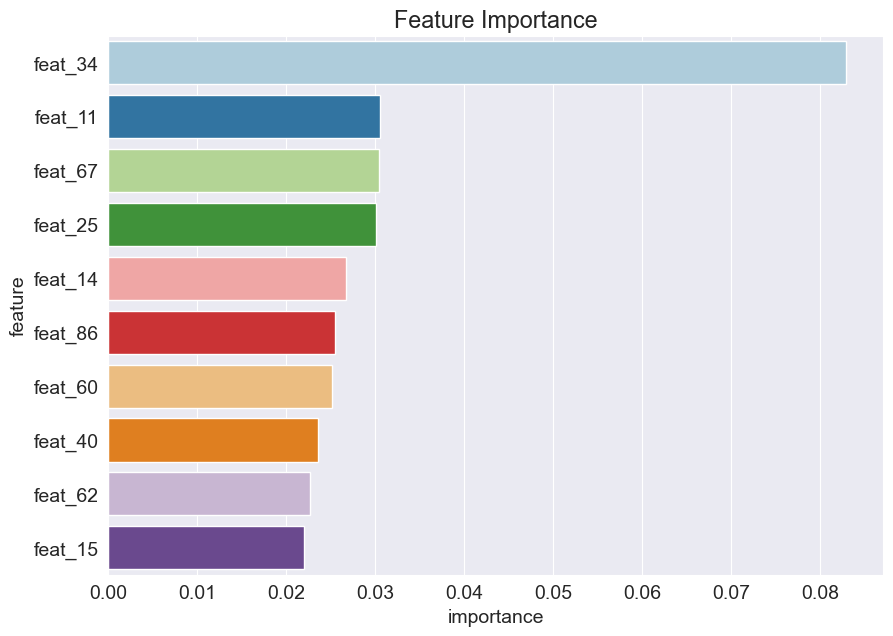

In [327]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [332]:
base_train_acc = rf.score(X_train, y_train)
base_val_acc = rf.score(X_val, y_val)

In [333]:
base_accs = base_train_acc, base_val_acc
base_accs

(1.0, 0.9748104755341144)

We are using this as a benchmark for hyperparmeter tuning. So as to measure if we are improving our model performance or not


 <a id="eight"></a>
# 8. Hyperparameter Tuning
<a href=#cont>Back to Table of Contents</a>

The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance, just as we might turn the knobs of an AM radio to get a clear signal (or your parents might have!). While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training. In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. (The parameters of a random forest are the variables and thresholds used to split each node learned during training). 

The best hyperparameters are usually impossible to determine ahead of time, and tuning a model is where machine learning turns from a science into trial-and-error based engineering.

![](https://miro.medium.com/max/640/1*0215Gzmw56XvORtB7-Torw.webp)

Let's define a helper function test_params to make it easy to test hyperparameters.

In [334]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, **params).fit(X_train,y_train )
    return model.score(X_train, y_train), model.score(X_val, y_val)

## `n_estimators`

In [335]:
test_params(n_estimators=500)

(1.0, 0.9752929014472778)

In [336]:
base_accs

(1.0, 0.9748104755341144)

## `max_depth`

In [217]:
test_params(max_depth=30)

(0.9910060476576096, 0.9629910406616127)

In [220]:
test_params(max_depth=500)

(1.0, 0.9738800827015851)

In [221]:
base_accs

(1.0, 0.974776016540317)

## `max_leaf_nodes`

In [226]:
test_params(max_leaf_nodes=2**20)

(1.0, 0.9732253618194349)

In [227]:
base_accs

(1.0, 0.974776016540317)

## `max_features`

In [228]:
test_params(max_features='log2')

(1.0, 0.9741902136457615)

In [230]:
test_params(max_features=20)

(1.0, 0.9728118538938663)

#### Putting together all the hyperparameters that actually affected the model

In [237]:
model2 = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500)

In [238]:
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

model2.score(X_train, y_train), model2.score(X_val, y_val)


 <a id="nine"></a>
# 9. Saving Model
<a href=#cont>Back to Table of Contents</a>

In [ ]:
import joblib

In [343]:
otto_class = {
    'model': model2,
    'scaler': scale_df,
    'input_cols': RX_cols,
    'target_col': Ry_col
}

In [344]:
joblib.dump(otto_class, 'otto_class.joblib')

['otto_class.joblib']

Lets make classifications for the test set

In [242]:
test_pred = model2.predict(X_test_scaled)

In [243]:
test_pred

array(['Class_4', 'Class_6', 'Class_6', ..., 'Class_3', 'Class_4',
       'Class_3'], dtype=object)

In [247]:
# converting to a dataframe
pred_df = pd.DataFrame(test_pred, columns = ['target'])

In [248]:
pred_df

,target
0,Class_4
1,Class_6
2,Class_6
3,Class_2
4,Class_9
...,...
144363,Class_1
144364,Class_3
144365,Class_3
144366,Class_4



 <a id="ten"></a>
# 10. Conclusion
<a href=#cont>Back to Table of Contents</a>

- We training both SVC and RandomForest models, we opted for randomforest since it was the best performing and
  after several hyperparameter tunning, we were able to improve the validation accuracy from 0.974 to 0.975


 <a id="eleven"></a>
# 11. References
<a href=#cont>Back to Table of Contents</a>

The following resources helped me in putting this project together

1. Hyperparameter tuning on RandomForest - https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

2. Explore https://explore-datascience.net/

3. Numpy to dataframe https://datatofish.com/numpy-array-to-pandas-dataframe/